In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# <font color='red'>DATA IMPORTING

In [2]:
df=pd.read_csv(r"C:\Users\mitra\Desktop\credit_risk_dataset.csv")

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.shape # Show how many records and columns are in the dataset

(32581, 12)

In [5]:
df.columns # Show all the columns name

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
df.info() # Show all infomation(Column Name,Not Null Value,Data Type) about all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()  # show null value of of columns

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

There is some null values in person_emp_length & loan_int_rate

In [8]:
df['person_emp_length']

0        123.0
1          5.0
2          1.0
3          4.0
4          8.0
         ...  
32576      1.0
32577      4.0
32578      3.0
32579      5.0
32580      2.0
Name: person_emp_length, Length: 32581, dtype: float64

In [9]:
print("Mean of this feature: ", df['person_emp_length'].mean())
print("Median of this feature: ", df['person_emp_length'].median())

Mean of this feature:  4.789686296787225
Median of this feature:  4.0


In [10]:
df['person_emp_length']=df['person_emp_length'].replace(np.nan,df['person_emp_length'].median())

In [11]:
df["loan_int_rate"]

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 32581, dtype: float64

In [12]:
print("Mean of this feature: ", df['loan_int_rate'].mean())
print("Median of this feature: ", df['loan_int_rate'].median())

Mean of this feature:  11.01169489224439
Median of this feature:  10.99


In [13]:
df['loan_int_rate']=df['loan_int_rate'].replace(np.nan,df['person_emp_length'].mean())

In [14]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Now there is no null values present in any feature

# <font color='red'>Univariate Analysis On Numerical Features
    
##    <font color='blue'>Non-Vizualize
    Min
    Max
    Cental Tendency
    percentiles
    Dispersion
    
##   <font color='blue'> Vizualize
    plot of Dist- Distribution
    plot of box plot- outlier

### <font color='brown'>1. person_age

In [15]:
df['person_age']

0        22
1        21
2        25
3        23
4        24
         ..
32576    57
32577    54
32578    65
32579    56
32580    66
Name: person_age, Length: 32581, dtype: int64

In [16]:
print('minimum value of this feature :       ',df['person_age'].min())    # Show the minimum value of feature
print('maximum value of this feature :       ',df['person_age'].max())    # Show the maximum value of feature
print('mean of this feature :                ',df['person_age'].mean())   # Show the mean value of feature
print('median of this feature :              ',df['person_age'].median()) # Show the median value of feature
print('standard deviation of this feature :  ',df['person_age'].std())    # Show the standard deviation of feature

minimum value of this feature :        20
maximum value of this feature :        144
mean of this feature :                 27.73459992019889
median of this feature :               26.0
standard deviation of this feature :   6.3480784192252475


<AxesSubplot:>

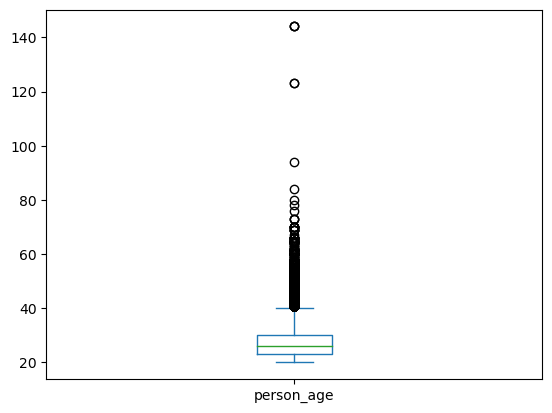

In [17]:
df['person_age'].plot(kind='box') # show the outlier of this feature

person_age feature has some outliers

<AxesSubplot:ylabel='Density'>

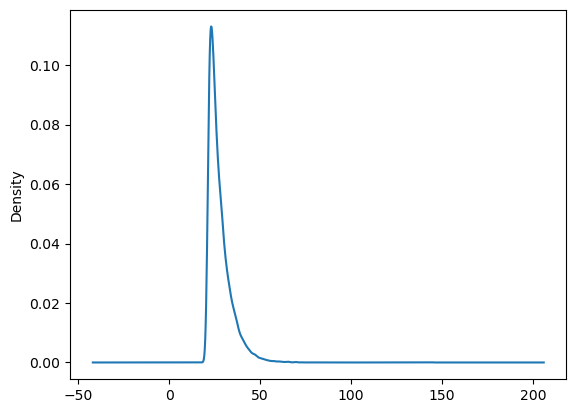

In [18]:
df['person_age'].plot(kind='kde') # show the feature normally distributed or not using kde plot

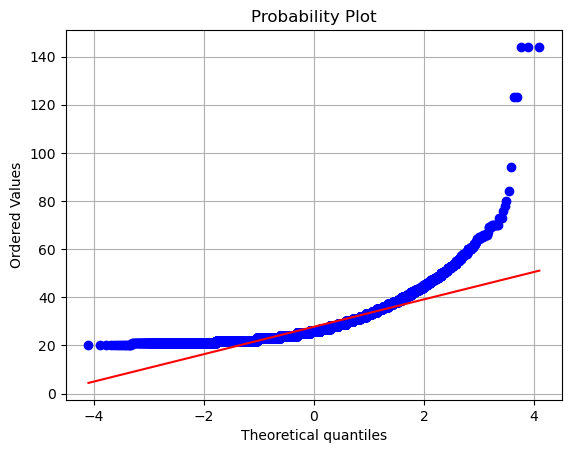

In [19]:
stats.probplot(df['person_age'],dist='norm',plot=plt) # Exactly show the feature normally distributed or not using probabilty plot
plt.grid()

In [20]:
df['person_age'].skew()

2.5813925261849846

person_age is not normally distributed

### <font color='green'> OUTLIER DETECTION

#### q1=df[column name].quantile(0.25)
#### q3=df[column name].quantile(0.75)

#### IQR= q3-q1

#### upper limt=q1-(1.5*IQR)
#### lower limt=q3+(1.5*IQR)

In [21]:
q1=df['person_age'].quantile(0.25)
q3=df['person_age'].quantile(0.75)

iqr=q3-q1

upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

print('first quartile: ',q1)
print('third quartile: ',q3)
print('inter quartile range: ',iqr)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

first quartile:  23.0
third quartile:  30.0
inter quartile range:  7.0
upper limit:  40.5
lower limit:  12.5


In [22]:
df[(df['person_age'] < lower_limit) | (df['person_age'] > upper_limit)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,4.767994,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.690000,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.160000,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.490000,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.990000,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.480000,0,0.10,N,26


### <font color='grey'>Capping

In [23]:
df["person_age"] = df["person_age"].apply(lambda x : lower_limit if x < lower_limit  else  upper_limit  if x > upper_limit else x)

In [24]:
df[(df['person_age'] < lower_limit) | (df['person_age'] > upper_limit)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


<AxesSubplot:>

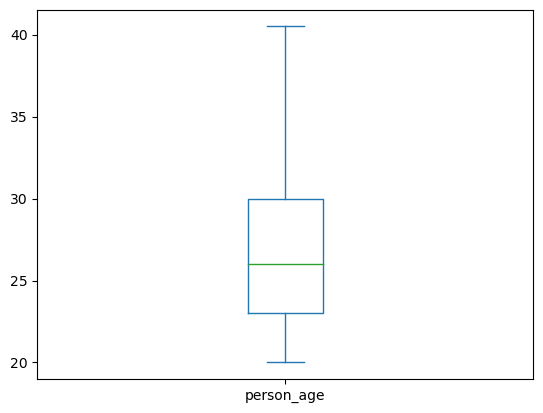

In [25]:
df['person_age'].plot(kind='box') 

Now person_age feature has no outliers

In [26]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### <font color='brown'>2. person_income

In [27]:
df["person_income"]

0         59000
1          9600
2          9600
3         65500
4         54400
          ...  
32576     53000
32577    120000
32578     76000
32579    150000
32580     42000
Name: person_income, Length: 32581, dtype: int64

In [28]:
print('minimum value of this feature :       ',df['person_income'].min())    # Show the minimum value of feature
print('maximum value of this feature :       ',df['person_income'].max())    # Show the maximum value of feature
print('mean of this feature :                ',df['person_income'].mean())   # Show the mean value of feature
print('median of this feature :              ',df['person_income'].median()) # Show the median value of feature
print('standard deviation of this feature :  ',df['person_income'].std())    # Show the standard deviation of feature

minimum value of this feature :        4000
maximum value of this feature :        6000000
mean of this feature :                 66074.84846996715
median of this feature :               55000.0
standard deviation of this feature :   61983.119168159064


<AxesSubplot:>

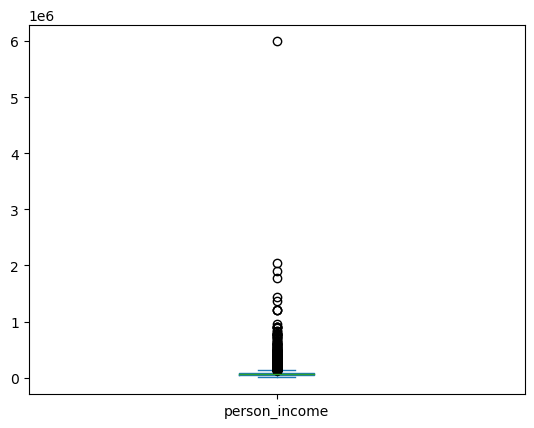

In [29]:
df["person_income"].plot(kind='box')

person_income feature has outliers

<AxesSubplot:ylabel='Density'>

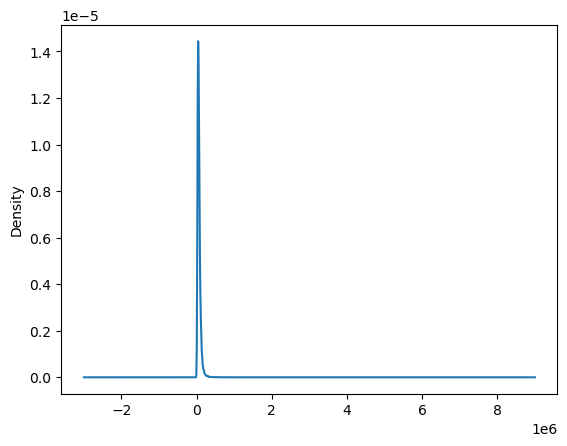

In [30]:
df["person_income"].plot(kind='kde')

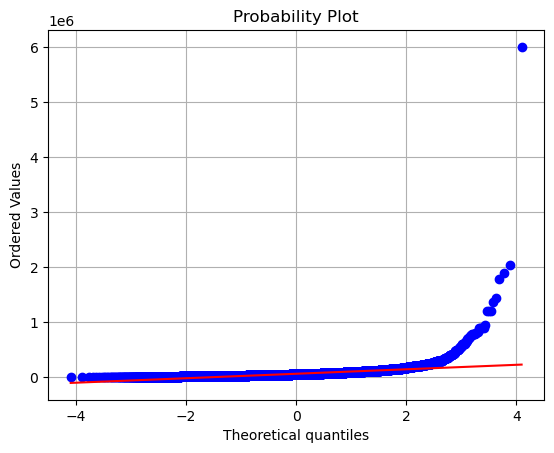

In [31]:
stats.probplot(df['person_income'],dist='norm',plot=plt) # Exactly show the feature normally distributed or not using probabilty plot
plt.grid()

In [32]:
df['person_income'].skew()

32.865348833904434

person_income is not normally distributed

### <font color='green'> OUTLIER DETECTION

In [33]:
q1=df['person_income'].quantile(0.25)
q3=df['person_income'].quantile(0.75)

iqr=q3-q1

upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

print('first quartile: ',q1)
print('third quartile: ',q3)
print('inter quartile range: ',iqr)
print('upper limit: ',upper)
print('lower limit: ',lower)

first quartile:  38500.0
third quartile:  79200.0
inter quartile range:  40700.0
upper limit:  140250.0
lower limit:  -22550.0


In [34]:
df[(df['person_income'] < lower) | (df['person_income'] > upper)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15,23.0,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.650000,0,0.06,N,3
20,25.0,162500,RENT,2.0,VENTURE,A,35000,7.490000,0,0.22,N,4
33,25.0,306000,RENT,2.0,DEBTCONSOLIDATION,C,24250,13.850000,0,0.08,N,3
34,26.0,300000,MORTGAGE,10.0,MEDICAL,C,7800,13.490000,0,0.03,N,4
42,26.0,300000,MORTGAGE,10.0,VENTURE,A,20000,7.880000,0,0.07,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32544,40.5,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.910000,0,0.01,N,20
32546,40.5,1900000,MORTGAGE,5.0,PERSONAL,A,1500,4.767994,0,0.00,N,21
32551,40.5,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.910000,0,0.01,N,19
32562,40.5,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.380000,0,0.15,N,21


### <font color='grey'>Capping

In [35]:
df["person_income"] = df["person_income"].apply(lambda x : lower if x < lower  else  upper  if x > upper else x)

In [36]:
df[(df['person_income'] < lower) | (df['person_income'] > upper)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


<AxesSubplot:>

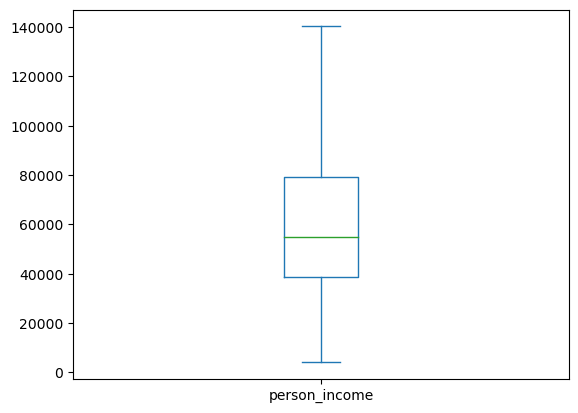

In [37]:
df["person_income"].plot(kind='box')

Now person_income feature has no outliers

### <font color='brown'>3. person_emp_length

In [38]:
df['person_emp_length']

0        123.0
1          5.0
2          1.0
3          4.0
4          8.0
         ...  
32576      1.0
32577      4.0
32578      3.0
32579      5.0
32580      2.0
Name: person_emp_length, Length: 32581, dtype: float64

In [39]:
print('minimum value of this feature :       ',df['person_emp_length'].min())    # Show the minimum value of feature
print('maximum value of this feature :       ',df['person_emp_length'].max())    # Show the maximum value of feature
print('mean of this feature :                ',df['person_emp_length'].mean())   # Show the mean value of feature
print('median of this feature :              ',df['person_emp_length'].median()) # Show the median value of feature
print('standard deviation of this feature :  ',df['person_emp_length'].std())    # Show the standard deviation of feature

minimum value of this feature :        0.0
maximum value of this feature :        123.0
mean of this feature :                 4.767993615911114
median of this feature :               4.0
standard deviation of this feature :   4.087371678206524


<AxesSubplot:>

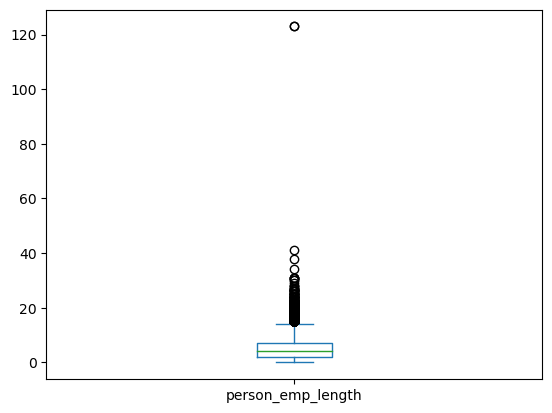

In [40]:
df['person_emp_length'].plot(kind='box')

person_emp_length feature has outliers

<AxesSubplot:ylabel='Density'>

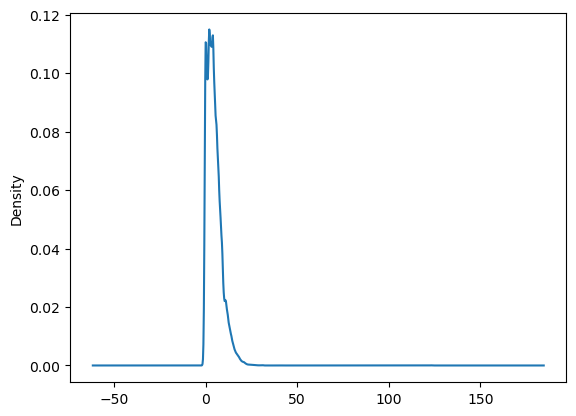

In [41]:
df['person_emp_length'].plot(kind='kde')

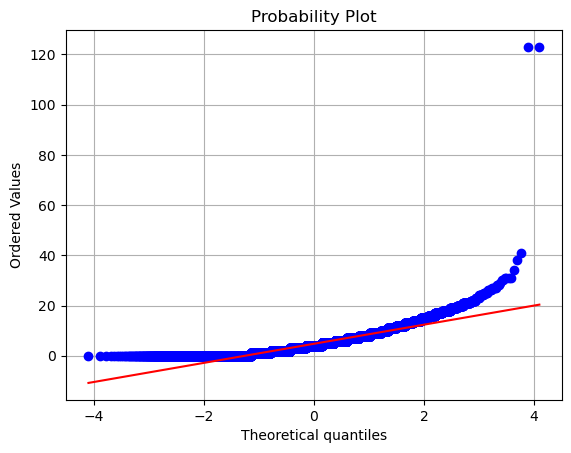

In [42]:
stats.probplot(df['person_emp_length'],dist='norm',plot=plt)
plt.grid()

In [43]:
df['person_emp_length'].skew()

2.6628784524960363

person_emp_length feature is not normally distributed

### <font color='green'> OUTLIER DETECTION

In [44]:
q1=df['person_emp_length'].quantile(0.25)
q3=df['person_emp_length'].quantile(0.75)

iqr=q3-q1

upper_per_len=q3+(1.5*iqr)
lower_per_len=q1-(1.5*iqr)

print('first quartile: ',q1)
print('third quartile: ',q3)
print('inter quartile range: ',iqr)
print('upper limit: ',upper_per_len)
print('lower limit: ',lower_per_len)

first quartile:  2.0
third quartile:  7.0
inter quartile range:  5.0
upper limit:  14.5
lower limit:  -5.5


In [45]:
df[(df['person_emp_length'] < lower_per_len) | (df['person_emp_length'] > upper_per_len)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21.0,140250.0,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
17834,34.0,140250.0,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,0.00,N,7
17847,35.0,140250.0,MORTGAGE,17.0,DEBTCONSOLIDATION,C,20000,13.85,0,0.04,Y,7
17850,34.0,120000.0,RENT,17.0,VENTURE,B,35000,10.59,0,0.29,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
32516,40.5,29000.0,OWN,23.0,PERSONAL,A,7000,7.49,0,0.24,N,20
32519,40.5,115900.0,MORTGAGE,16.0,PERSONAL,A,12000,7.88,0,0.10,N,29
32534,40.5,75000.0,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,N,25
32539,40.5,140250.0,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,1,0.16,N,20


### <font color='grey'>Capping

In [46]:
df["person_emp_length"] = df["person_emp_length"].apply(lambda x : lower_per_len if x < lower_per_len  else  upper_per_len  if x > upper_per_len else x)

In [47]:
df[(df['person_emp_length'] < lower_per_len) | (df['person_emp_length'] > upper_per_len)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


<AxesSubplot:>

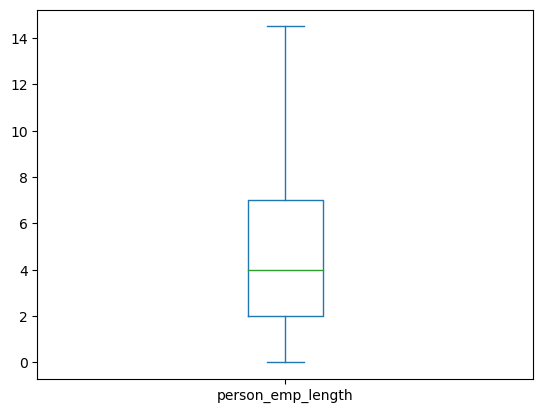

In [48]:
df["person_emp_length"].plot(kind='box')

Now there is no outlier in person_emp_length feature

### <font color='brown'>4. loan_amnt

In [49]:
df['loan_amnt']

0        35000
1         1000
2         5500
3        35000
4        35000
         ...  
32576     5800
32577    17625
32578    35000
32579    15000
32580     6475
Name: loan_amnt, Length: 32581, dtype: int64

In [50]:
print('minimum value of this feature :       ',df['loan_amnt'].min())    # Show the minimum value of feature
print('maximum value of this feature :       ',df['loan_amnt'].max())    # Show the maximum value of feature
print('mean of this feature :                ',df['loan_amnt'].mean())   # Show the mean value of feature
print('median of this feature :              ',df['loan_amnt'].median()) # Show the median value of feature
print('standard deviation of this feature :  ',df['loan_amnt'].std())    # Show the standard deviation of feature

minimum value of this feature :        500
maximum value of this feature :        35000
mean of this feature :                 9589.371105859243
median of this feature :               8000.0
standard deviation of this feature :   6322.086645792174


<AxesSubplot:>

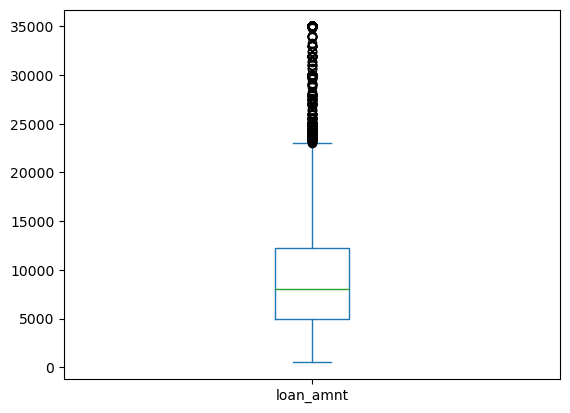

In [51]:
df['loan_amnt'].plot(kind='box')

loan_amnt feature has outliers

<AxesSubplot:ylabel='Density'>

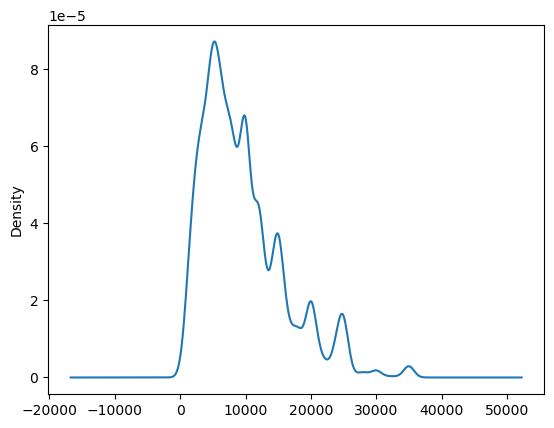

In [52]:
df['loan_amnt'].plot(kind='kde')

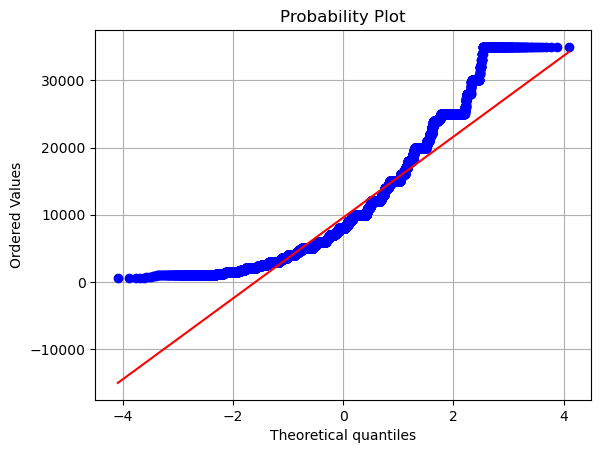

In [53]:
stats.probplot(df['loan_amnt'],dist='norm',plot=plt)
plt.grid()

In [54]:
df['loan_amnt'].skew()

1.1924774277661998

loan_amnt feature is not normally distributed

### <font color='green'> OUTLIER DETECTION

In [55]:
q1=df['loan_amnt'].quantile(0.25)
q3=df['loan_amnt'].quantile(0.75)

iqr=q3-q1

upper_loan_amnt=q3+(1.5*iqr)
lower_loan_amnt=q1-(1.5*iqr)

print('first quartile: ',q1)
print('third quartile: ',q3)
print('inter quartile range: ',iqr)
print('upper limit: ',upper_loan_amnt)
print('lower limit: ',lower_loan_amnt)

first quartile:  5000.0
third quartile:  12200.0
inter quartile range:  7200.0
upper limit:  23000.0
lower limit:  -5800.0


In [56]:
df[(df['loan_amnt'] < lower_loan_amnt) | (df['loan_amnt'] > upper_loan_amnt)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,14.5,PERSONAL,D,35000,16.02,1,0.59,Y,3
3,23.0,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24.0,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,26.0,77100.0,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24.0,78956.0,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32524,40.5,120000.0,MORTGAGE,2.0,PERSONAL,A,30000,7.90,0,0.25,N,22
32539,40.5,140250.0,MORTGAGE,14.5,DEBTCONSOLIDATION,B,24000,10.38,1,0.16,N,20
32541,40.5,140250.0,MORTGAGE,9.0,PERSONAL,D,25000,14.11,1,0.15,N,30
32562,40.5,140250.0,MORTGAGE,14.5,PERSONAL,B,24000,10.38,0,0.15,N,21


### <font color='grey'>Capping

In [57]:
df["loan_amnt"] = df["loan_amnt"].apply(lambda x : lower_loan_amnt if x < lower_loan_amnt  else  upper_loan_amnt  if x > upper_loan_amnt else x)

In [58]:
df[(df['loan_amnt'] < lower_loan_amnt) | (df['loan_amnt'] > upper_loan_amnt)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


<AxesSubplot:>

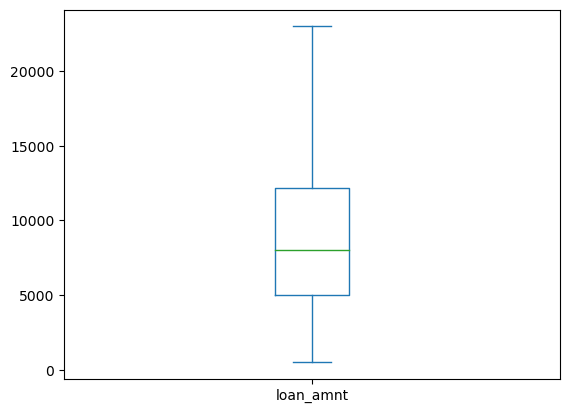

In [59]:
df['loan_amnt'].plot(kind='box')

Now loan_amnt feature has no outlier

### <font color='brown'>5. loan_status

In [60]:
df['loan_status']

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [61]:
print('minimum value of this feature :       ',df['loan_status'].min())    # Show the minimum value of feature
print('maximum value of this feature :       ',df['loan_status'].max())    # Show the maximum value of feature
print('mean of this feature :                ',df['loan_status'].mean())   # Show the mean value of feature
print('median of this feature :              ',df['loan_status'].median()) # Show the median value of feature
print('standard deviation of this feature :  ',df['loan_status'].std())    # Show the standard deviation of feature

minimum value of this feature :        0
maximum value of this feature :        1
mean of this feature :                 0.21816396059052823
median of this feature :               0.0
standard deviation of this feature :   0.4130056685601785


<AxesSubplot:>

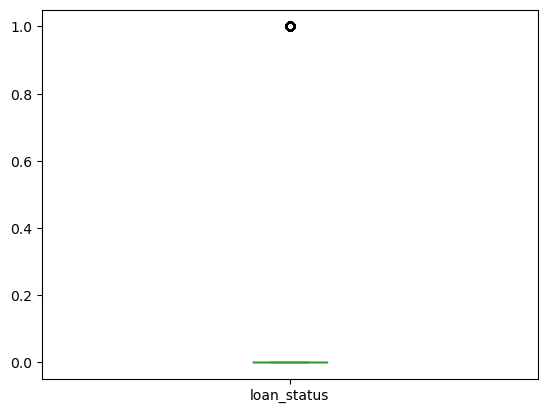

In [62]:
df['loan_status'].plot(kind='box')

loan_status feature has some outlier..It is a target feature so we donot treat outlier detection

<AxesSubplot:ylabel='Density'>

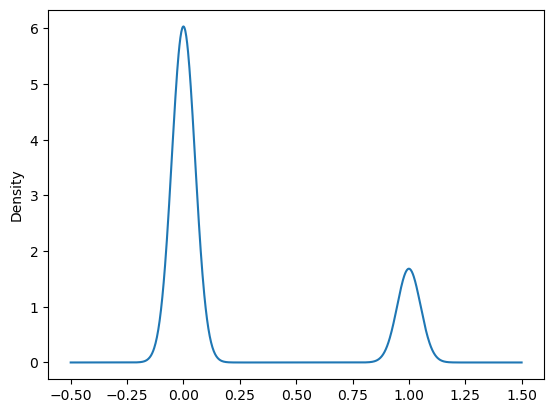

In [63]:
df['loan_status'].plot(kind='kde')

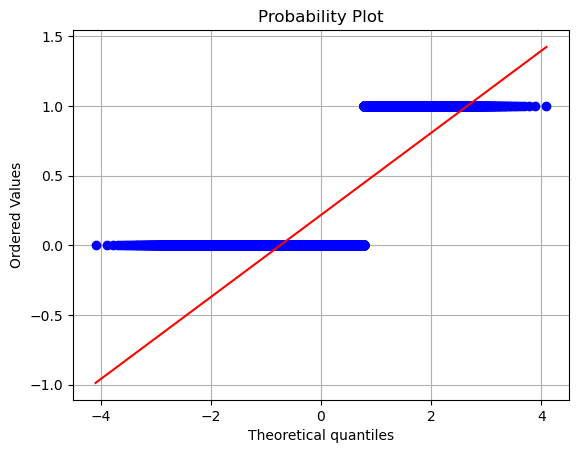

In [64]:
stats.probplot(df['loan_status'],dist='norm',plot=plt)
plt.grid()

In [65]:
df['loan_status'].skew()

1.3648884873271683

loan_status feature is not normally distributed

### <font color='brown'>6. loan_percent_income

In [66]:
df['loan_percent_income']

0        0.59
1        0.10
2        0.57
3        0.53
4        0.55
         ... 
32576    0.11
32577    0.15
32578    0.46
32579    0.10
32580    0.15
Name: loan_percent_income, Length: 32581, dtype: float64

In [67]:
print('minimum value of this feature :       ',df['loan_percent_income'].min())    # Show the minimum value of feature
print('maximum value of this feature :       ',df['loan_percent_income'].max())    # Show the maximum value of feature
print('mean of this feature :                ',df['loan_percent_income'].mean())   # Show the mean value of feature
print('median of this feature :              ',df['loan_percent_income'].median()) # Show the median value of feature
print('standard deviation of this feature :  ',df['loan_percent_income'].std())    # Show the standard deviation of feature

minimum value of this feature :        0.0
maximum value of this feature :        0.83
mean of this feature :                 0.17020349283325145
median of this feature :               0.15
standard deviation of this feature :   0.10678175634492885


<AxesSubplot:>

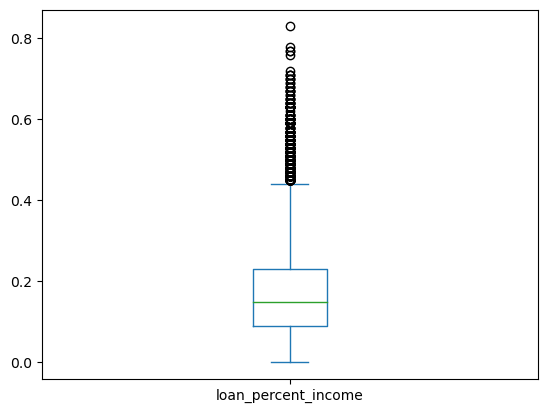

In [68]:
df['loan_percent_income'].plot(kind='box')

loan_percent_income feature has outliers

<AxesSubplot:ylabel='Density'>

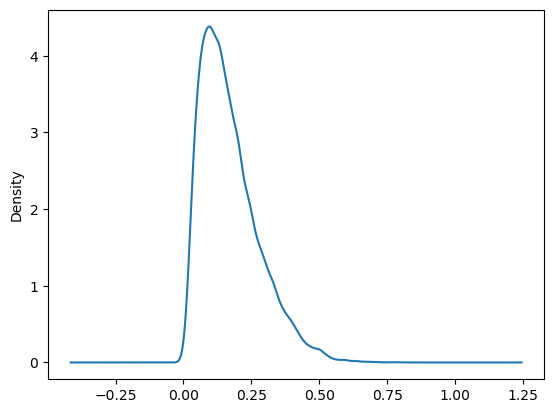

In [69]:
df['loan_percent_income'].plot(kind='kde')

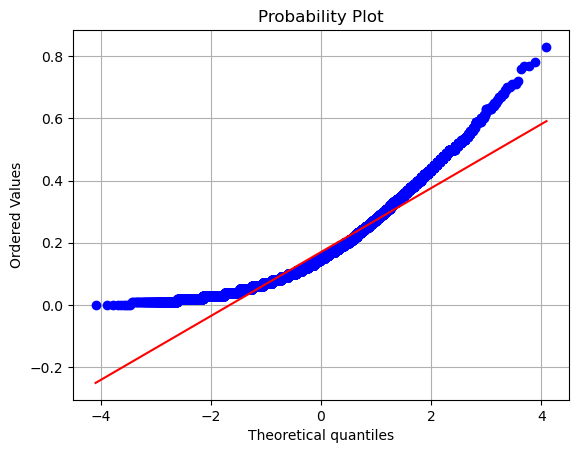

In [70]:
stats.probplot(df['loan_percent_income'],dist='norm',plot=plt)
plt.grid()

In [71]:
df['loan_percent_income'].skew()

1.0646686367683245

loan_percent_income feature is not normally distributed

### <font color='green'> OUTLIER DETECTION

In [72]:
q1=df['loan_percent_income'].quantile(0.25)
q3=df['loan_percent_income'].quantile(0.75)

iqr=q3-q1

upper_loan_per_income=q3+(1.5*iqr)
lower_loan_per_income=q1-(1.5*iqr)

print('first quartile: ',q1)
print('third quartile: ',q3)
print('inter quartile range: ',iqr)
print('upper limit: ',upper_loan_per_income)
print('lower limit: ',lower_loan_per_income)

first quartile:  0.09
third quartile:  0.23
inter quartile range:  0.14
upper limit:  0.44000000000000006
lower limit:  -0.12000000000000002


In [73]:
df[(df['loan_percent_income'] < lower_loan_per_income) | (df['loan_percent_income'] > upper_loan_per_income)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,14.5,PERSONAL,D,23000.0,16.020000,1,0.59,Y,3
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.870000,1,0.57,N,3
3,23.0,65500.0,RENT,4.0,MEDICAL,C,23000.0,15.230000,1,0.53,N,2
4,24.0,54400.0,RENT,8.0,MEDICAL,C,23000.0,14.270000,1,0.55,Y,4
6,26.0,77100.0,RENT,8.0,EDUCATION,B,23000.0,12.420000,1,0.45,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32307,40.5,53700.0,RENT,1.0,HOMEIMPROVEMENT,D,23000.0,4.767994,1,0.56,Y,28
32309,40.5,60000.0,RENT,4.0,MEDICAL,C,23000.0,4.767994,1,0.45,Y,28
32317,40.5,43000.0,RENT,14.5,DEBTCONSOLIDATION,D,22250.0,14.590000,1,0.52,Y,23
32369,40.5,39000.0,MORTGAGE,4.0,PERSONAL,B,20000.0,10.710000,0,0.51,N,19


### <font color='grey'>Capping

In [74]:
df["loan_percent_income"] = df["loan_percent_income"].apply(lambda x : lower_loan_per_income if x < lower_loan_per_income  else  upper_loan_per_income  if x > upper_loan_per_income else x)

In [75]:
df[(df['loan_percent_income'] < lower_loan_per_income) | (df['loan_percent_income'] > upper_loan_per_income)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


<AxesSubplot:>

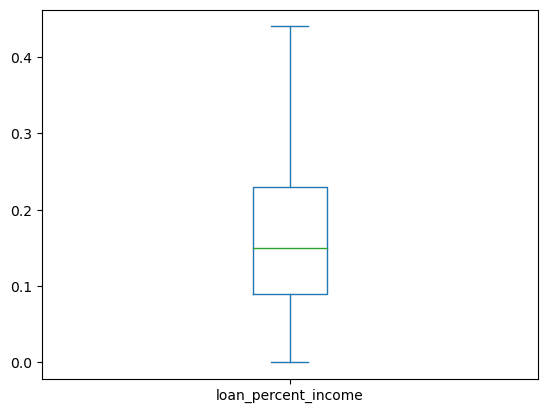

In [76]:
df['loan_percent_income'].plot(kind='box')

Now there is no outliers in loan_percent_income feature

### <font color='brown'>7. cb_person_cred_hist_length

In [77]:
df['cb_person_cred_hist_length']

0         3
1         2
2         3
3         2
4         4
         ..
32576    30
32577    19
32578    28
32579    26
32580    30
Name: cb_person_cred_hist_length, Length: 32581, dtype: int64

In [78]:
print('minimum value of this feature :       ',df['cb_person_cred_hist_length'].min())    # Show the minimum value of feature
print('maximum value of this feature :       ',df['cb_person_cred_hist_length'].max())    # Show the maximum value of feature
print('mean of this feature :                ',df['cb_person_cred_hist_length'].mean())   # Show the mean value of feature
print('median of this feature :              ',df['cb_person_cred_hist_length'].median()) # Show the median value of feature
print('standard deviation of this feature :  ',df['cb_person_cred_hist_length'].std())    # Show the standard deviation of feature

minimum value of this feature :        2
maximum value of this feature :        30
mean of this feature :                 5.804211043246064
median of this feature :               4.0
standard deviation of this feature :   4.0550011647128406


<AxesSubplot:>

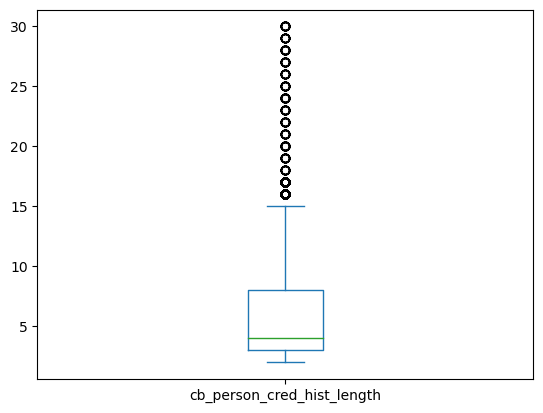

In [79]:
df['cb_person_cred_hist_length'].plot(kind='box')

cb_person_cred_hist_length feature has outliers

<AxesSubplot:ylabel='Density'>

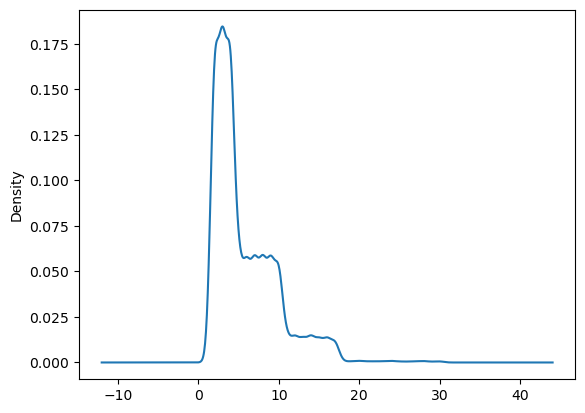

In [80]:
df['cb_person_cred_hist_length'].plot(kind='kde')

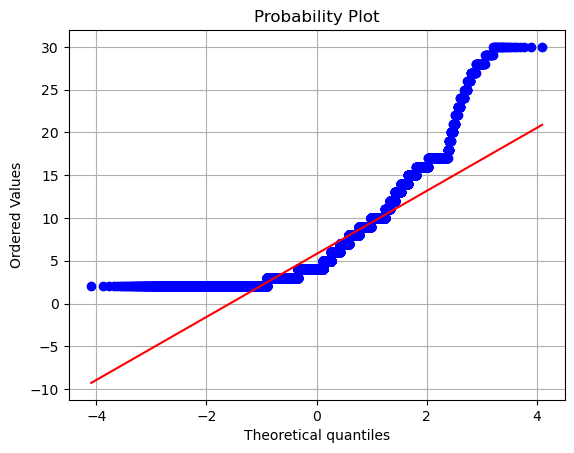

In [81]:
stats.probplot(df['cb_person_cred_hist_length'],dist='norm',plot=plt)
plt.grid()

In [82]:
df['cb_person_cred_hist_length'].skew()

1.6617901199126253

cb_person_cred_hist_length feature is not normally distributed

### <font color='green'> OUTLIER DETECTION

In [83]:
q1=df['cb_person_cred_hist_length'].quantile(0.25)
q3=df['cb_person_cred_hist_length'].quantile(0.75)

iqr=q3-q1

upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

print('first quartile: ',q1)
print('third quartile: ',q3)
print('inter quartile range: ',iqr)
print('upper limit: ',upper)
print('lower limit: ',lower)

first quartile:  3.0
third quartile:  8.0
inter quartile range:  5.0
upper limit:  15.5
lower limit:  -4.5


In [84]:
df[(df['cb_person_cred_hist_length'] < lower) | (df['cb_person_cred_hist_length'] > upper)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29120,40.0,140250.0,MORTGAGE,1.0,MEDICAL,A,10000.0,4.767994,0,0.01,N,16
29125,37.0,80000.0,RENT,0.0,HOMEIMPROVEMENT,B,23000.0,11.990000,1,0.44,N,17
29127,40.5,140250.0,MORTGAGE,4.0,MEDICAL,C,20000.0,4.767994,1,0.03,Y,16
29130,37.0,85000.0,RENT,5.0,HOMEIMPROVEMENT,A,23000.0,8.900000,1,0.41,N,17
29133,40.5,140250.0,MORTGAGE,3.0,DEBTCONSOLIDATION,A,16000.0,7.900000,0,0.03,N,17
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40.5,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.160000,0,0.11,N,30
32577,40.5,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.490000,0,0.15,N,19
32578,40.5,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,23000.0,10.990000,1,0.44,N,28
32579,40.5,140250.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.480000,0,0.10,N,26


### <font color='grey'>Capping

In [85]:
df["cb_person_cred_hist_length"] = df["cb_person_cred_hist_length"].apply(lambda x : lower if x < lower  else  upper  if x > upper else x)

In [86]:
df[(df['cb_person_cred_hist_length'] < lower) | (df['cb_person_cred_hist_length'] > upper)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


<AxesSubplot:>

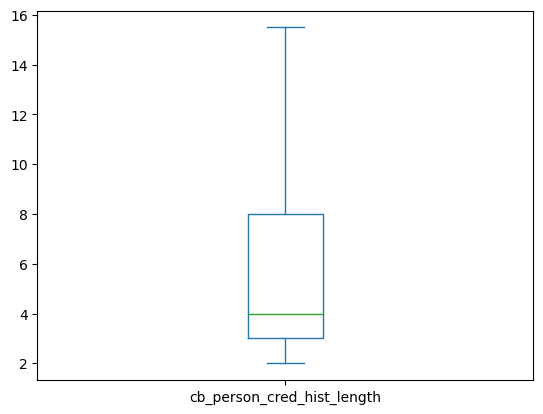

In [87]:
df['cb_person_cred_hist_length'].plot(kind='box')

Now there is no outliers in cb_person_cred_hist_length feature

### <font color='brown'>8. loan_int_rate

In [88]:
df['loan_int_rate']

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 32581, dtype: float64

In [89]:
print('minimum value of this feature :       ',df['loan_int_rate'].min())    # Show the minimum value of feature
print('maximum value of this feature :       ',df['loan_int_rate'].max())    # Show the maximum value of feature
print('mean of this feature :                ',df['loan_int_rate'].mean())   # Show the mean value of feature
print('median of this feature :              ',df['loan_int_rate'].median()) # Show the median value of feature
print('standard deviation of this feature :  ',df['loan_int_rate'].std())    # Show the standard deviation of feature

minimum value of this feature :        4.767993615911114
maximum value of this feature :        23.22
mean of this feature :                 10.414556278419346
median of this feature :               10.62
standard deviation of this feature :   3.587223253844611


<AxesSubplot:>

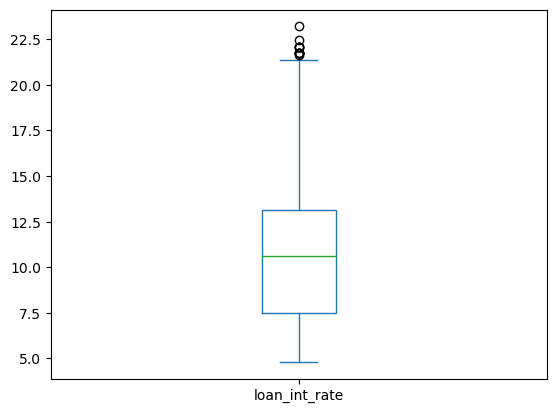

In [90]:
df['loan_int_rate'].plot(kind='box')

loan_int_rate feature has outliers

<AxesSubplot:ylabel='Density'>

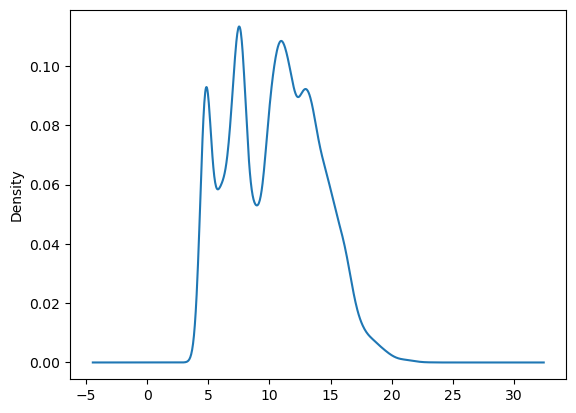

In [91]:
df['loan_int_rate'].plot(kind='kde')

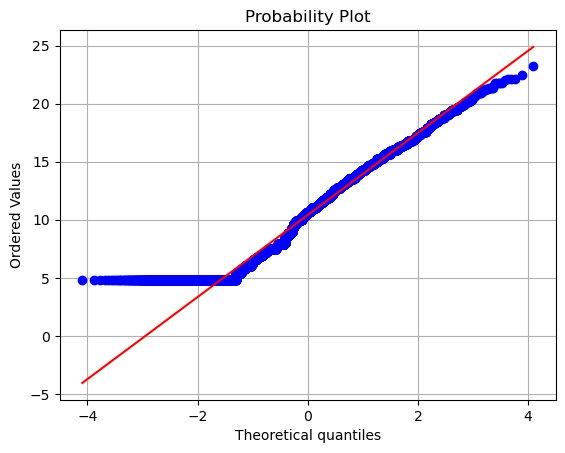

In [92]:
stats.probplot(df['loan_int_rate'],dist='norm',plot=plt)
plt.grid()

In [93]:
df['loan_int_rate'].skew()

0.13871584150276564

In [94]:
np.round(df['loan_int_rate'].skew())

0.0

loan_int_rate feature is normally distributed

### <font color='green'> OUTLIER DETECTION

#### MEAN-STD METHOD :
#### LOWER LIMIT= MEAN-(3*STD)
#### UPPER LIMIT= MEAN+(3*STD)

In [95]:
mean_loan_int=df['loan_int_rate'].mean() # Mean value of BMI feature

In [96]:
std_loan_int=df['loan_int_rate'].std() # Standard Deviation of BMI feature

In [97]:
low_limit=mean_loan_int-(3*std_loan_int) # Lower Limit of BMI feature

In [98]:
up_limit=mean_loan_int+(3*std_loan_int) # Upper Limit of BMI feature

In [99]:
df[(df['loan_int_rate']<low_limit)|(df['loan_int_rate']>up_limit)] # Show records of the outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
523,23.0,56000.0,RENT,8.0,MEDICAL,G,21600.0,21.21,1,0.39,Y,4.0
1827,24.0,30000.0,RENT,5.0,MEDICAL,G,2000.0,21.27,1,0.07,Y,3.0
2436,22.0,23000.0,RENT,1.0,MEDICAL,F,2800.0,21.74,1,0.12,N,4.0
2897,22.0,35000.0,MORTGAGE,4.0,VENTURE,F,5000.0,21.36,0,0.14,Y,2.0
4899,24.0,33000.0,RENT,1.0,MEDICAL,F,5000.0,21.36,1,0.15,N,2.0
6449,23.0,34255.0,RENT,7.0,VENTURE,G,6000.0,22.11,1,0.18,Y,3.0
7470,24.0,30500.0,RENT,2.0,EDUCATION,F,6800.0,21.74,1,0.22,Y,3.0
13499,26.0,44000.0,RENT,4.0,HOMEIMPROVEMENT,G,12500.0,22.11,1,0.28,Y,2.0
15223,23.0,113000.0,MORTGAGE,0.0,VENTURE,G,19750.0,21.21,1,0.17,N,4.0
15744,24.0,44400.0,RENT,4.0,EDUCATION,F,15650.0,21.74,1,0.35,N,4.0


In [100]:
df["loan_int_rate"] = df["loan_int_rate"].apply(lambda x : low_limit if x < low_limit  else  up_limit  if x > up_limit else x)

In [101]:
df[(df['loan_int_rate']<low_limit)|(df['loan_int_rate']>up_limit)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


<AxesSubplot:>

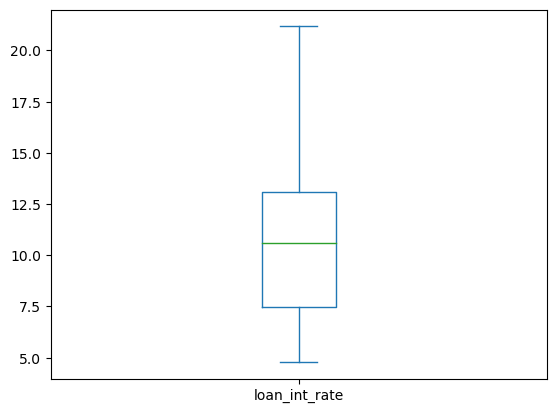

In [102]:
df['loan_int_rate'].plot(kind='box')

Now there is no outliers in loan_int_rate feature

# <font color='red'>Univariate Analysis On Categorical Features
##   <font color='blue'>Non-Vizualize
     counts- value_counts
    
##   <font color='blue'> Vizualize
     count plot
     bar plot

In [103]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,14.5,PERSONAL,D,23000.0,16.02,1,0.44,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.44,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,23000.0,15.23,1,0.44,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,23000.0,14.27,1,0.44,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40.5,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0,0.11,N,15.5
32577,40.5,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0,0.15,N,15.5
32578,40.5,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,23000.0,10.99,1,0.44,N,15.5
32579,40.5,140250.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0,0.10,N,15.5


In [104]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### <font color='brown'>1. person_home_ownership 

In [105]:
df['person_home_ownership']

0            RENT
1             OWN
2        MORTGAGE
3            RENT
4            RENT
           ...   
32576    MORTGAGE
32577    MORTGAGE
32578        RENT
32579    MORTGAGE
32580        RENT
Name: person_home_ownership, Length: 32581, dtype: object

In [106]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

<AxesSubplot:>

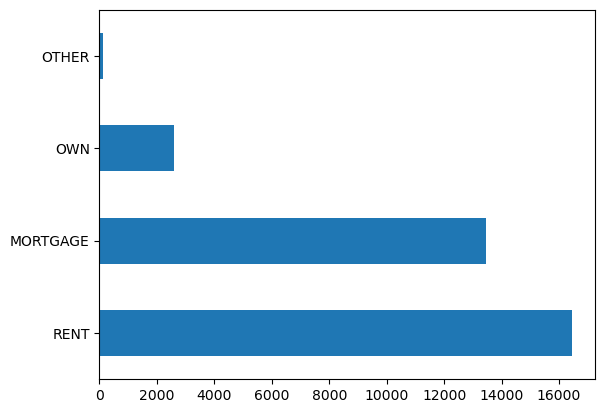

In [107]:
df['person_home_ownership'].value_counts().plot(kind='barh')

Rent ownership is more

### <font color='brown'>2. loan_intent 

In [108]:
df['loan_intent']

0               PERSONAL
1              EDUCATION
2                MEDICAL
3                MEDICAL
4                MEDICAL
              ...       
32576           PERSONAL
32577           PERSONAL
32578    HOMEIMPROVEMENT
32579           PERSONAL
32580            MEDICAL
Name: loan_intent, Length: 32581, dtype: object

In [109]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

<AxesSubplot:>

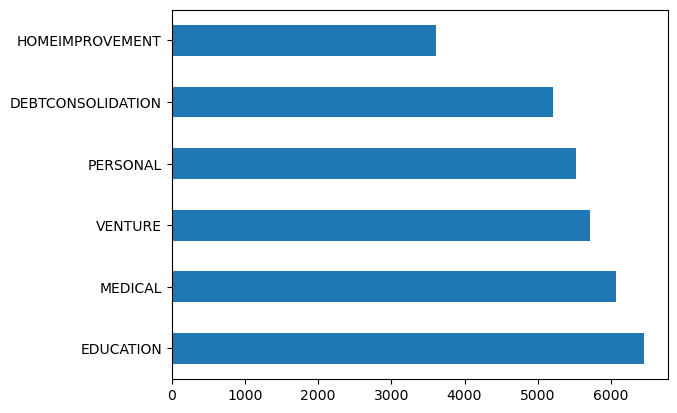

In [110]:
df['loan_intent'].value_counts().plot(kind='barh')

Education Loan Intent is more

### <font color='brown'>3. loan_grade 

In [111]:
df['loan_grade']

0        D
1        B
2        C
3        C
4        C
        ..
32576    C
32577    A
32578    B
32579    B
32580    B
Name: loan_grade, Length: 32581, dtype: object

In [112]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

<AxesSubplot:>

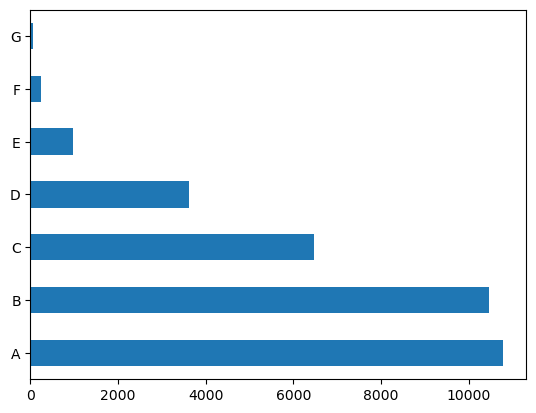

In [113]:
df['loan_grade'].value_counts().plot(kind='barh')

"A" Loan Grade is more

### <font color='brown'>4. cb_person_default_on_file 

In [114]:
df['cb_person_default_on_file']

0        Y
1        N
2        N
3        N
4        Y
        ..
32576    N
32577    N
32578    N
32579    N
32580    N
Name: cb_person_default_on_file, Length: 32581, dtype: object

In [115]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

<AxesSubplot:>

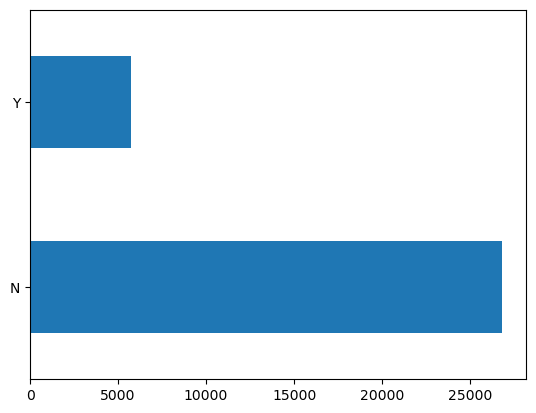

In [116]:
df['cb_person_default_on_file'].value_counts().plot(kind='barh')

# <font color='red'>Bivariate Analysis 

In [117]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,14.5,PERSONAL,D,23000.0,16.02,1,0.44,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.44,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,23000.0,15.23,1,0.44,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,23000.0,14.27,1,0.44,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40.5,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0,0.11,N,15.5
32577,40.5,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0,0.15,N,15.5
32578,40.5,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,23000.0,10.99,1,0.44,N,15.5
32579,40.5,140250.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0,0.10,N,15.5


In [118]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### <font color='red'>NUM VS NUM

In [126]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,14.5,PERSONAL,D,23000.0,16.02,1,0.44,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.44,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,23000.0,15.23,1,0.44,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,23000.0,14.27,1,0.44,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40.5,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0,0.11,N,15.5
32577,40.5,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0,0.15,N,15.5
32578,40.5,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,23000.0,10.99,1,0.44,N,15.5
32579,40.5,140250.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0,0.10,N,15.5


In [127]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<AxesSubplot:xlabel='cb_person_cred_hist_length', ylabel='loan_status'>

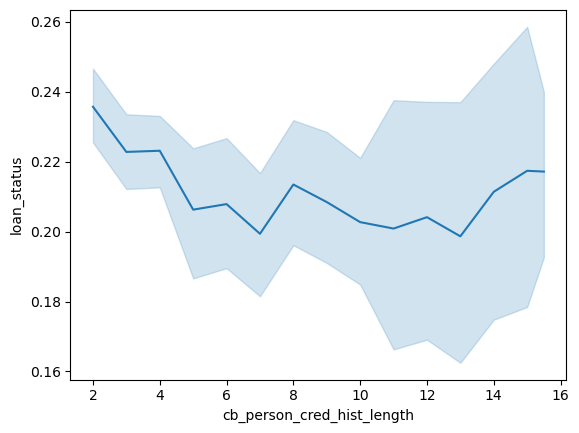

In [128]:
sns.lineplot(x=df['cb_person_cred_hist_length'],y=df['loan_status'])

### 

In [129]:
df['person_age']=df['person_age'].astype('int64')

<AxesSubplot:xlabel='person_age', ylabel='loan_status'>

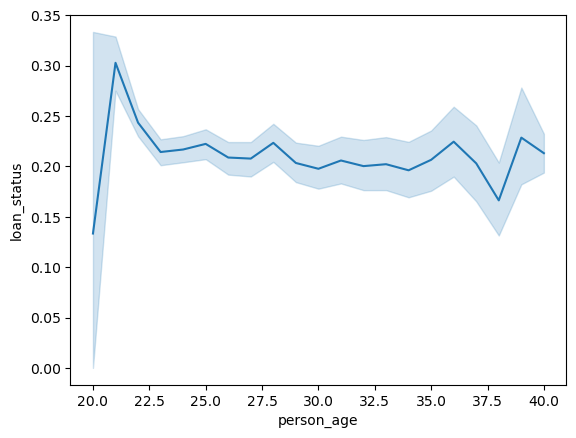

In [130]:
sns.lineplot(x=df['person_age'],y=df['loan_status'])

The person who have the age between 20 to 23 is more loan status

<AxesSubplot:xlabel='person_emp_length', ylabel='loan_status'>

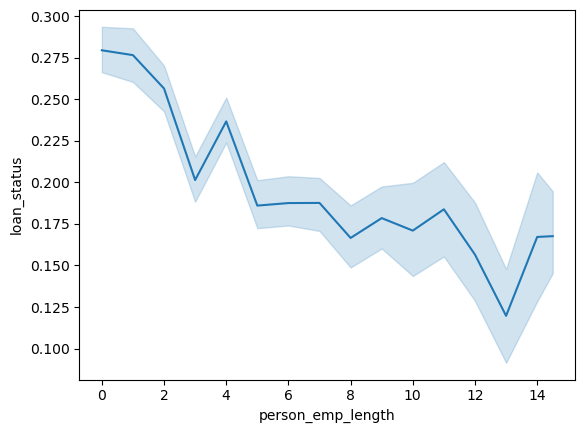

In [131]:
sns.lineplot(x=df['person_emp_length'],y=df['loan_status'])

<AxesSubplot:xlabel='loan_int_rate', ylabel='loan_status'>

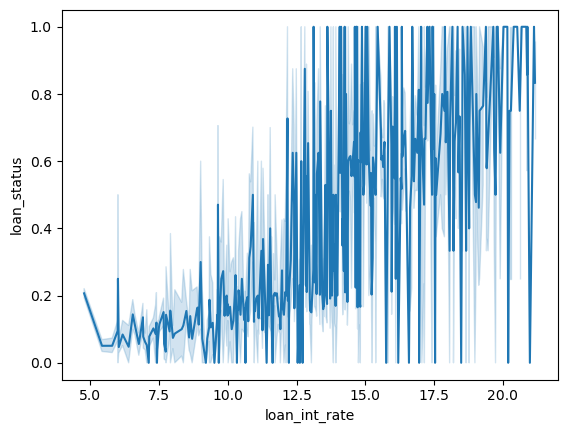

In [132]:
sns.lineplot(x=df['loan_int_rate'],y=df['loan_status'])

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_status'>

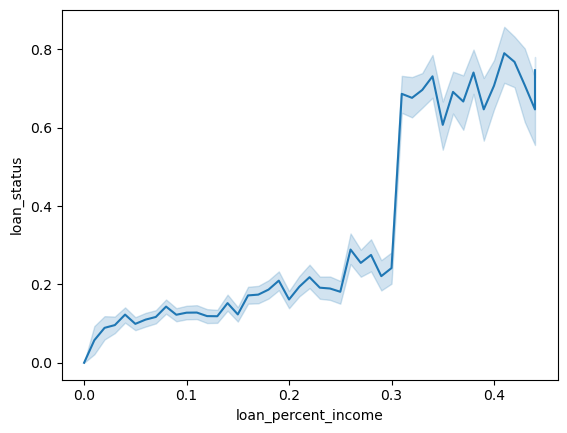

In [133]:
sns.lineplot(x=df['loan_percent_income'],y=df['loan_status'])

The person who have 0.4 percent income is more loan status

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

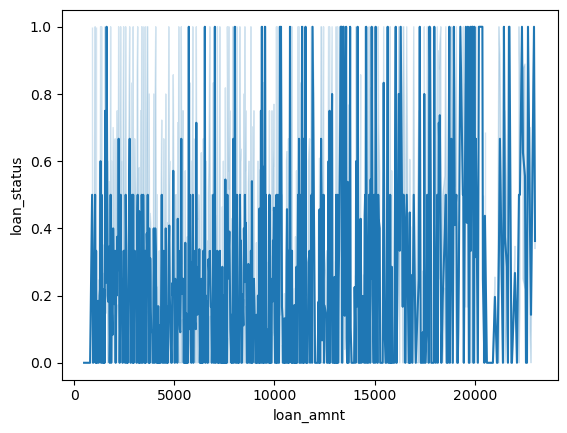

In [134]:
sns.lineplot(x=df['loan_amnt'],y=df['loan_status'])

In between 15000 to 20000 the person have more loan status.

### <font color='red'>NUM VS CATEGORICAL

<AxesSubplot:title={'center':'loan_status'}, xlabel='person_home_ownership'>

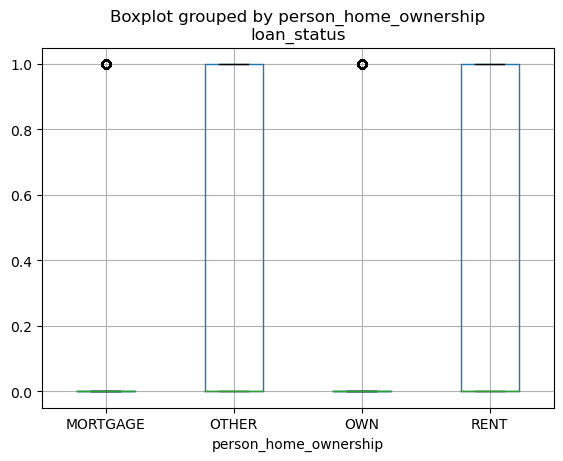

In [135]:
df.boxplot(by="person_home_ownership",column="loan_status")

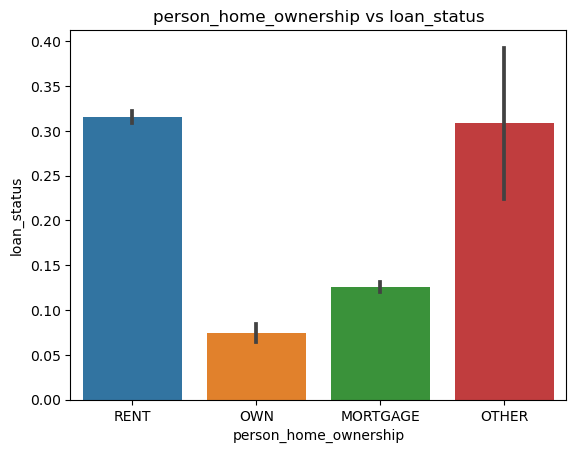

In [136]:
sns.barplot(x=df['person_home_ownership'],y=df['loan_status'])
plt.title('person_home_ownership vs loan_status')
plt.show()

The other & rent home-ownership have more loan_status

<AxesSubplot:xlabel='loan_status', ylabel='loan_intent'>

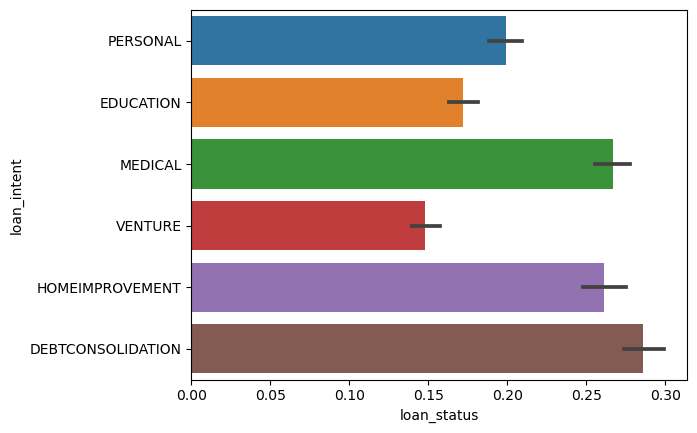

In [137]:
sns.barplot(y=df['loan_intent'],x=df['loan_status'])

The person who have Debtconsolidation is more Loan status.

<AxesSubplot:xlabel='loan_grade', ylabel='loan_status'>

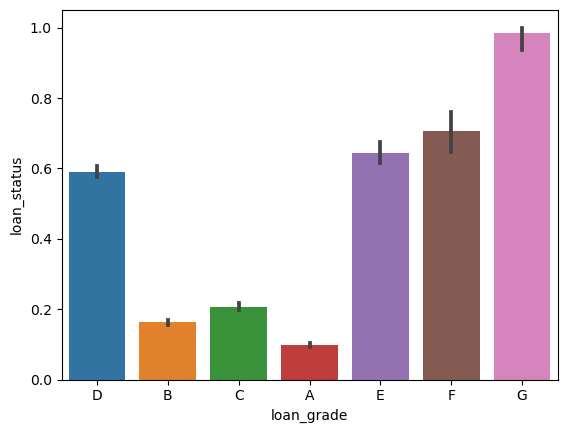

In [138]:
sns.barplot(x=df['loan_grade'],y=df['loan_status'])

The person who have 'G' loan Grade is more Loan Status

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='loan_status'>

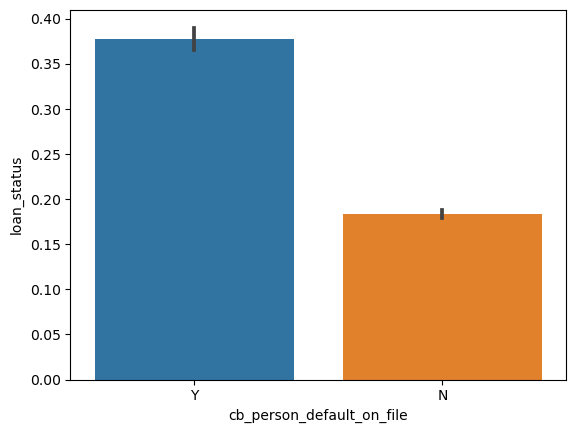

In [139]:
sns.barplot(x=df['cb_person_default_on_file'],y=df['loan_status'])

The person who have Historical Default "Yes" is more Loan Status

### CONCLUSION

    Now that we have understood and gained insight into the dataset ie performed an Exploratory data Analysis.So let's summarize what we have learnt in this case study,,
    - We have extensively covered pre-processing steps required to analyze data.
    - We have covered Null value imputation methods.
    - We have also covered step by step analyzing techniques such as Univariate analysis,Bivariate analysis..

### KEY INSIGHTS
    1.person_home_ownership: Person having rented apartment is more
    2.loan_intent: Education loan interest is more.
    3.The person who have the age between 20 to 23 is more loan status
    4.In between 15000 to 20000 the person have more loan status.
    5.The other & rent home-ownership have more loan_status
    6.The person who have Debtconsolidation is more Loan status.
    7.The person who have 'G' loan Grade is more Loan Status
    8.The person who have Historical Default "Yes" is more Loan Status

### RECOMMADATION
    - Grant loan to clients with healthy overall loan status.
    - Grant loan at higher interest rates to clients with comparatively low loan status otherwise reject loan for them.
    - Grant loan which have better loan grade.
    - Reject loan for clients which have Historical Default "Yes".
    

### 